# DIFFERENT STRATEGIES

In [1]:
''' import libraries '''
from pandas_datareader import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats

## raw data got from yahoo for google stock

In [2]:
start_date = '2014-01-01'
end_date = '2018-01-01'
SRC_DATA_FILENAME='goog_data.pkl'
try:
    goog_data = pd.read_pickle(SRC_DATA_FILENAME)
    print('File data found...reading GOOG data')
except FileNotFoundError:
    print('File not found...downloading the GOOG data')
    goog_data = data.DataReader('GOOG', 'yahoo', start_date, end_date)
    goog_data.to_pickle(SRC_DATA_FILENAME)
    goog_data_signal = pd.DataFrame(index=goog_data.index)
    goog_data_signal['price'] = goog_data['Adj Close']
    
# goog_data
#  in this i am saving the data for google stock in a csv file becuase I will have to use the raw data
#  for every day calculations so its better to save it on the pc

File data found...reading GOOG data


# SMA - Simple Moving Average

In [3]:
time_period = 20 # number of days over which to average
history = [] # to track a history of prices
sma_values = [] # to track simple moving average values

close = goog_data['Close']

for close_price in goog_data['Close']:
    history.append(close_price)
    if len(history) > time_period: 
        # we remove oldest price because we only average over last 'time_period' prices
        del (history[0])
    sma_values.append(stats.mean(history))

goog_data = goog_data.assign(ClosePrice=pd.Series(close,index=goog_data.index))
goog_data = goog_data.assign(Simple20DayMovingAverage=pd.Series(sma_values, index=goog_data.index))
close_price = goog_data['ClosePrice']
sma = goog_data['Simple20DayMovingAverage']

In [4]:
goog_data.head(10) # test for current goog_data

,High,Low,Open,Close,Volume,Adj Close,ClosePrice,Simple20DayMovingAverage
Date,,,,,,,,
2014-01-02,556.788025,552.060730,555.647278,554.481689,3656454.0,554.481689,554.481689,554.481689
2014-01-03,556.379578,550.401978,555.418152,550.436829,3345894.0,550.436829,550.436829,552.459259
2014-01-06,557.340942,551.154114,554.426880,556.573853,3551864.0,556.573853,556.573853,553.830790
2014-01-07,567.717041,558.486633,560.399475,567.303589,5124336.0,567.303589,567.303589,557.198990
2014-01-08,571.517822,564.528992,570.860291,568.484192,4501811.0,568.484192,568.484192,559.456030
2014-01-09,569.973572,560.678467,569.585083,563.009705,4184626.0,563.009705,563.009705,560.048309
2014-01-10,567.413208,559.029602,567.413208,562.979797,4303069.0,562.979797,562.979797,560.467093
2014-01-13,571.313599,556.499084,561.131714,559.393250,4855933.0,559.393250,559.393250,560.332863
2014-01-14,573.350952,561.938721,566.850281,572.553955,4983811.0,572.553955,572.553955,561.690762


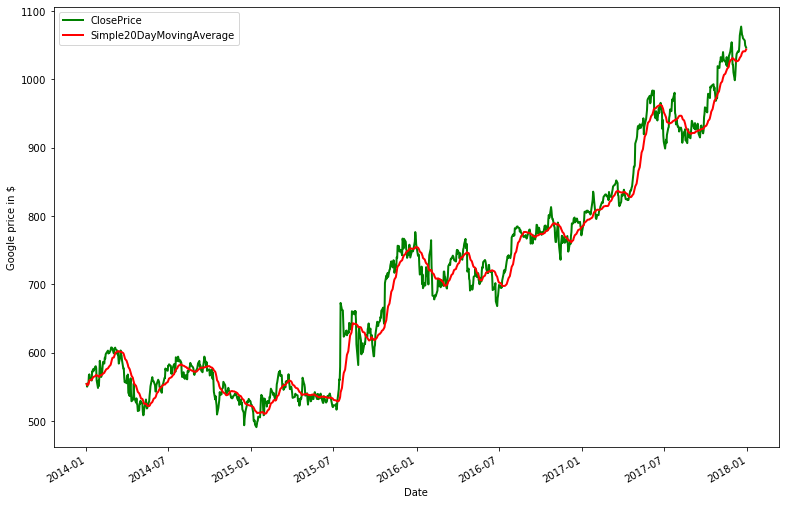

In [5]:
fig = plt.figure(figsize = (13, 9))
ax1 = fig.add_subplot(111, ylabel='Google price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
sma.plot(ax=ax1, color='r', lw=2., legend=True)
plt.savefig('sma.png')
plt.show()

This is a simple moving Average calculator and it is used to determin the strength of the momentum in various ways. For further information I have used this link https://www.investopedia.com/terms/s/sma.asp

# EMA - Exponential Moving Average 

In [6]:
num_periods = 20 # number of days over which to average
K = 2 / (num_periods + 1) # smoothing constant
ema_p = 0
ema_values = [] # to hold computed EMA values

for close_price in close:
    if (ema_p == 0):
        # first observation, EMA = current-price
        ema_p = close_price
    else:
        ema_p = (close_price - ema_p) * K + ema_p
    ema_values.append(ema_p)
        
goog_data = goog_data.assign(ClosePrice=pd.Series(close, index=goog_data.index))
goog_data = goog_data.assign(Exponential20DayMovingAverage=pd.Series(ema_values, index=goog_data.index))
close_price = goog_data['ClosePrice']
ema = goog_data['Exponential20DayMovingAverage']
ema

Date
2014-01-02     554.481689
2014-01-03     554.096465
2014-01-06     554.332406
2014-01-07     555.567757
2014-01-08     556.797894
                 ...     
2017-12-22    1046.004932
2017-12-26    1047.027319
2017-12-27    1047.250431
2017-12-28    1047.335153
2017-12-29    1047.246093
Name: Exponential20DayMovingAverage, Length: 1007, dtype: float64

In [7]:
goog_data.head(10) # test for current goog_data

,High,Low,Open,Close,Volume,Adj Close,ClosePrice,Simple20DayMovingAverage,Exponential20DayMovingAverage
Date,,,,,,,,,
2014-01-02,556.788025,552.060730,555.647278,554.481689,3656454.0,554.481689,554.481689,554.481689,554.481689
2014-01-03,556.379578,550.401978,555.418152,550.436829,3345894.0,550.436829,550.436829,552.459259,554.096465
2014-01-06,557.340942,551.154114,554.426880,556.573853,3551864.0,556.573853,556.573853,553.830790,554.332406
2014-01-07,567.717041,558.486633,560.399475,567.303589,5124336.0,567.303589,567.303589,557.198990,555.567757
2014-01-08,571.517822,564.528992,570.860291,568.484192,4501811.0,568.484192,568.484192,559.456030,556.797894
2014-01-09,569.973572,560.678467,569.585083,563.009705,4184626.0,563.009705,563.009705,560.048309,557.389495
2014-01-10,567.413208,559.029602,567.413208,562.979797,4303069.0,562.979797,562.979797,560.467093,557.921905
2014-01-13,571.313599,556.499084,561.131714,559.393250,4855933.0,559.393250,559.393250,560.332863,558.062033
2014-01-14,573.350952,561.938721,566.850281,572.553955,4983811.0,572.553955,572.553955,561.690762,559.442216


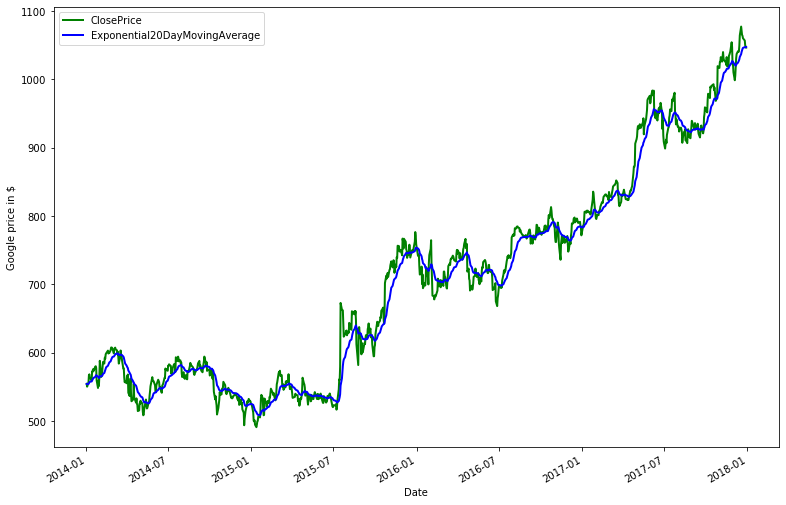

In [8]:
fig = plt.figure(figsize = (13,9))
ax1 = fig.add_subplot(111, ylabel='Google price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
ema.plot(ax=ax1, color='b', lw=2., legend=True)
plt.savefig('ema.png')
plt.show()

# APO - Absolute Price Oscillator

This is the difference between Fast_EMA and a Slow_EMA

In [9]:
K_fast = 2 /11 # smoothing factor for fast EMA, num_periods_fast = 10 # time period for the fast EMA
ema_fast = 0

K_slow = 2 /41 # smoothing factor for slow EMA, num_periods_slow = 40 # time period for slow EMA, 40+1
ema_slow = 0

ema_fast_values = [] 
ema_slow_values = []
apo_values = [] 

for close_price in close:
    if (ema_fast == 0): # first observation
        ema_fast = close_price
        ema_slow = close_price
    else:
        ema_fast = (close_price - ema_fast) * K_fast + ema_fast
        ema_slow = (close_price - ema_slow) * K_slow + ema_slow
    
    ema_fast_values.append(ema_fast)
    ema_slow_values.append(ema_slow)
    apo_values.append(ema_fast - ema_slow)

In [10]:
# goog_data = goog_data.assign(ClosePrice=pd.Series(close,index=goog_data.index))
goog_data = goog_data.assign(FastExponential10DayMovingAverage=pd.Series(ema_fast_values, index=goog_data.index))
goog_data = goog_data.assign(SlowExponential40DayMovingAverage=pd.Series(ema_slow_values, index=goog_data.index))
goog_data = goog_data.assign(AbsolutePriceOscillator=pd.Series(apo_values,index=goog_data.index))
close_price = goog_data['ClosePrice']
ema_f = goog_data['FastExponential10DayMovingAverage']
ema_s = goog_data['SlowExponential40DayMovingAverage']
apo = goog_data['AbsolutePriceOscillator']
# goog_data
apo

Date
2014-01-02     0.000000
2014-01-03    -0.538119
2014-01-06    -0.135693
2014-01-07     1.606166
2014-01-08     3.104623
                ...    
2017-12-22    26.505894
2017-12-26    25.265238
2017-12-27    23.095104
2017-12-28    21.037683
2017-12-29    19.018382
Name: AbsolutePriceOscillator, Length: 1007, dtype: float64

In [11]:
goog_data.head(10) # test for current goog_data

,High,Low,Open,Close,Volume,Adj Close,ClosePrice,Simple20DayMovingAverage,Exponential20DayMovingAverage,FastExponential10DayMovingAverage,SlowExponential40DayMovingAverage,AbsolutePriceOscillator
Date,,,,,,,,,,,,
2014-01-02,556.788025,552.060730,555.647278,554.481689,3656454.0,554.481689,554.481689,554.481689,554.481689,554.481689,554.481689,0.000000
2014-01-03,556.379578,550.401978,555.418152,550.436829,3345894.0,550.436829,550.436829,552.459259,554.096465,553.746260,554.284379,-0.538119
2014-01-06,557.340942,551.154114,554.426880,556.573853,3551864.0,556.573853,556.573853,553.830790,554.332406,554.260368,554.396061,-0.135693
2014-01-07,567.717041,558.486633,560.399475,567.303589,5124336.0,567.303589,567.303589,557.198990,555.567757,556.631863,555.025696,1.606166
2014-01-08,571.517822,564.528992,570.860291,568.484192,4501811.0,568.484192,568.484192,559.456030,556.797894,558.786832,555.682208,3.104623
2014-01-09,569.973572,560.678467,569.585083,563.009705,4184626.0,563.009705,563.009705,560.048309,557.389495,559.554627,556.039647,3.514980
2014-01-10,567.413208,559.029602,567.413208,562.979797,4303069.0,562.979797,562.979797,560.467093,557.921905,560.177385,556.378191,3.799194
2014-01-13,571.313599,556.499084,561.131714,559.393250,4855933.0,559.393250,559.393250,560.332863,558.062033,560.034815,556.525267,3.509548
2014-01-14,573.350952,561.938721,566.850281,572.553955,4983811.0,572.553955,572.553955,561.690762,559.442216,562.311022,557.307154,5.003868


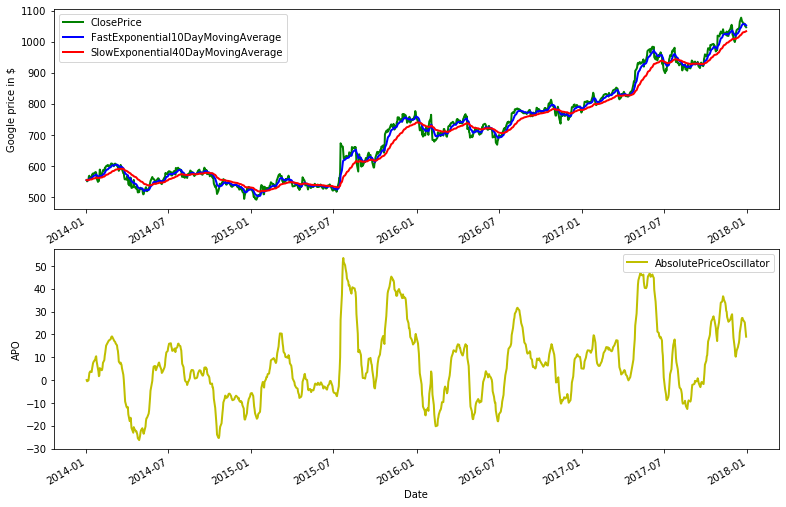

In [12]:
fig = plt.figure(figsize = (13,9))
ax1 = fig.add_subplot(211, ylabel='Google price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
ema_f.plot(ax=ax1, color='b', lw=2., legend=True)
ema_s.plot(ax=ax1, color='r', lw=2., legend=True)
ax2 = fig.add_subplot(212, ylabel='APO')
apo.plot(ax=ax2, color='y', lw=2., legend=True)
plt.show()

Conclusion: Here you can see as per the observation how the raw data is processed to calculate SMA and the EMA to provide a more realistic price moving average. Then the data is used foe further procession and we calculate a fast and slow EMA or we can say a high and slow reactive average price momentum and then we used it to calculate the APO.

APO is positive when in short term the avg price is breaking towards the upside which we can say that it is over bought in short term and then it is negative when it is deviating towards the downside and we can say that it is oversold in the long term.